### Откроем Excel файл в котором производилась раметка данных

In [1]:
import xlwings as xw
import pandas as pd
import os

os.chdir('C:/Users/onomy/py_repos/Project')

wb  = xw.Book('Razmetka_audiofaylov.xlsx')
data_excel = wb.sheets['Дарья']
df = data_excel.range('A1:K265').options(pd.DataFrame, header = 1, index = False).value
df.head()

,file name,id,gender,age,emotion,recording device,microphone,day,step,start,finish
0,Эмоции_Заданные/036/day02/Диалоги/0036_day02_s...,36.0,f,None,anger,phone,dict,2.0,2.0,0.070833,0.081250
1,Эмоции_Заданные/036/day02/Диалоги/0036_day02_s...,36.0,f,None,anger,phone,dict,2.0,2.0,0.087500,0.096528
2,Эмоции_Заданные/036/day02/Диалоги/0036_day02_s...,36.0,f,None,sadness,phone,dict,2.0,2.0,0.106944,0.120139
3,Эмоции_Заданные/036/day02/Диалоги/0036_day02_s...,36.0,f,None,sadness,phone,dict,2.0,2.0,0.131944,0.145833
4,Эмоции_Заданные/036/day02/Диалоги/0036_day02_s...,36.0,f,None,joy,phone,dict,2.0,2.0,0.148611,0.165278


### Выберем аудиофайл
**для примера: 0036_day02_step3_dict_dop**

In [2]:
audio_file = input('Enter file name: ')
file_df = df[df['file name'].str.contains(audio_file)]
file_df.head()

Enter file name: 0036_day02_step3_dict_dop


,file name,id,gender,age,emotion,recording device,microphone,day,step,start,finish
48,Эмоции_Заданные/036/day02/Тексты/0036_day02_st...,36.0,f,None,neutrality,phone,dict,2.0,3.0,0.027778,0.052778
49,Эмоции_Заданные/036/day02/Тексты/0036_day02_st...,36.0,f,None,dejection,phone,dict,2.0,3.0,0.054167,0.077083
50,Эмоции_Заданные/036/day02/Тексты/0036_day02_st...,36.0,f,None,sadness,phone,dict,2.0,3.0,0.079167,0.109722
51,Эмоции_Заданные/036/day02/Тексты/0036_day02_st...,36.0,f,None,neutrality,phone,dict,2.0,3.0,0.112500,0.131944
52,Эмоции_Заданные/036/day02/Тексты/0036_day02_st...,36.0,f,None,anxiety,phone,dict,2.0,3.0,0.134028,0.152083


In [3]:
file_df['emotion'].value_counts()

neutrality    4
anger         1
irritation    1
anxiety       1
dejection     1
gratitude     1
fear          1
joy           1
sadness       1
Name: emotion, dtype: int64

### Выберем эмоциональное состояние для анализа

In [4]:
emotion_s = input('Choose emotion:')
emotion_df = file_df[file_df['emotion'].str.contains(emotion_s)]
emotion_df

Choose emotion:neutrality


,file name,id,gender,age,emotion,recording device,microphone,day,step,start,finish
48,Эмоции_Заданные/036/day02/Тексты/0036_day02_st...,36.0,f,None,neutrality,phone,dict,2.0,3.0,0.027778,0.052778
51,Эмоции_Заданные/036/day02/Тексты/0036_day02_st...,36.0,f,None,neutrality,phone,dict,2.0,3.0,0.112500,0.131944
54,Эмоции_Заданные/036/day02/Тексты/0036_day02_st...,36.0,f,None,neutrality,phone,dict,2.0,3.0,0.177778,0.200694
57,Эмоции_Заданные/036/day02/Тексты/0036_day02_st...,36.0,f,None,neutrality,phone,dict,2.0,3.0,0.255556,0.277083


### Найдем начало и конец записи эмоции

В массиве st хранятся элементы начала записи.  
В массиве fin хранятся элементы конца записи.


In [5]:
st = emotion_df['start'].to_numpy()
fin = emotion_df['finish'].to_numpy()
print(st)
print(fin)

[0.02777778 0.1125     0.17777778 0.25555556]
[0.05277778 0.13194444 0.20069444 0.27708333]


### Воспроизведение участка аудиофайла с заданной эмоцией
**Если в данном файле эмоция проявляется больше одного раза, то нужно выбрать какой участок мы будем анализировать**

In [6]:
import IPython.display as ipd
import librosa

num_arr = int(input('Choose audio segment: '))

if num_arr > len(st):
    print('error num_arr value')
    exit(1)
    
audio_file_dir = str(emotion_df.iloc[0,0])

audio_arr, sr = librosa.load(audio_file_dir+'.wav')

st = st*1440*sr
fin = fin*1440*sr

ipd.Audio(audio_arr[int(st[num_arr - 1]):int(fin[num_arr - 1])], rate=sr)

Choose audio segment: 1


In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

### Визуализация участка массива аудиофайла

Text(0.5, 1.0, 'neutrality')

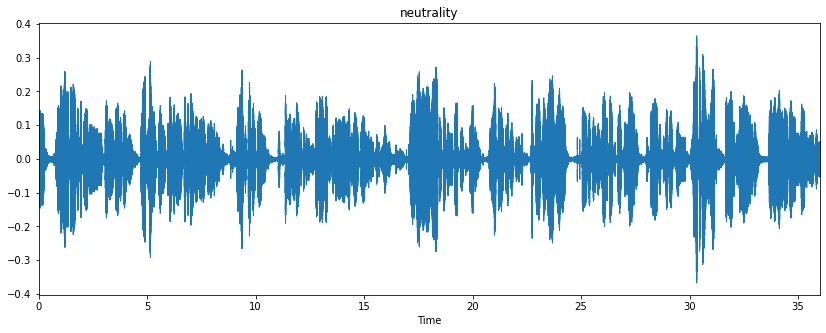

In [9]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(audio_arr[int(st[num_arr - 1]):int(fin[num_arr - 1])], sr=sr)
plt.title(emotion_s)

### Спектрограмма участка массива

Text(0.5, 1.0, 'neutrality')

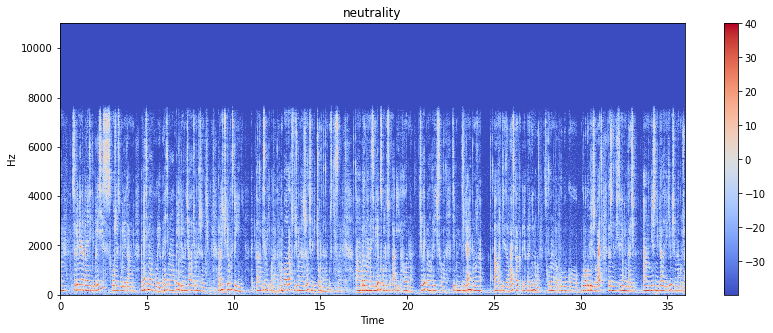

In [11]:
spec = librosa.stft(audio_arr[int(st[num_arr - 1]):int(fin[num_arr - 1])])
spec_db = librosa.amplitude_to_db(abs(spec))
plt.figure(figsize=(14, 5))
librosa.display.specshow(spec_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.title(emotion_s)

### Произведем нарезку файлов (только для длинныйх сценариев)
**1) Запишим все сегменты аудиофайла в массив**  
**2) Преобразуем данные из массива в .wav файлы**  
**3) Сохраним файлы в указанной директории**

In [161]:
from scipy.io.wavfile import write
import numpy as np

directory = audio_file_dir + '_folder' 

print(os.getcwd()) 
if not os.path.exists(directory):
    os.makedirs(directory)

os.chdir(directory)

start = file_df['start'].to_numpy()
finish = file_df['finish'].to_numpy()

start = start*1440*sr
finish = finish*1440*sr

index_list = file_df.index.tolist()
emotion_list = list(file_df['emotion'])

for i in range(len(start)):
    samples = audio_arr[int(start[i]):int(finish[i])]
    scaled = np.int16(samples/np.max(np.abs(samples)) * 32767)
    write(audio_file + '_' + str(emotion_iter[i]) + '_' + str(i+1) + '.wav', sr, scaled)



C:\Users\onomy\py_repos\Project
